In [151]:
# !pip install pandas_datareader

In [152]:
import import_ipynb
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')


In [153]:
df = web.DataReader('ORCL', data_source='yahoo',start='2012-01-01', end='2022-10-30')

df.head()
df
df.shape
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.660000,25.830000,26.330000,25.860001,37911800.0,22.004938
2012-01-04,26.230000,25.549999,25.950001,26.010000,45418500.0,22.132587
2012-01-05,26.900000,25.910000,26.010000,26.590000,50873400.0,22.626120
2012-01-06,27.150000,26.360001,26.670000,26.930000,55685000.0,22.915438
2012-01-09,27.120001,26.660000,26.900000,27.030001,38481100.0,23.051886


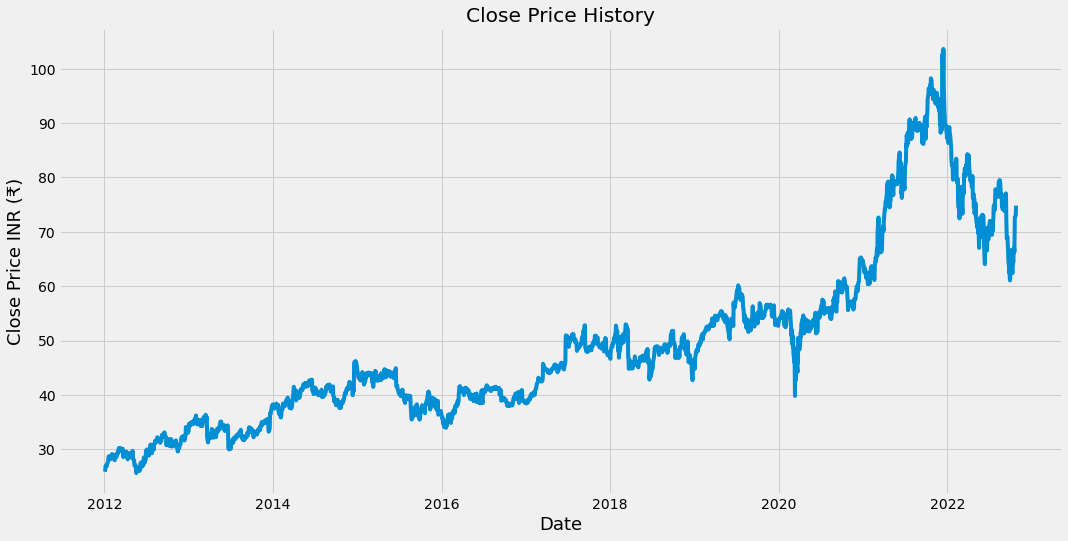

In [154]:
plt.figure(figsize=(16, 8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

In [155]:
data = df.filter(['Close'])
# print(data)
dataset = data.values
# print(dataset)
training_data_len = math.ceil( len(dataset)* .8)

training_data_len

2179

In [156]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00320349],
       [0.00512557],
       [0.01255766],
       ...,
       [0.60622754],
       [0.60904662],
       [0.63057405]])

In [157]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00320349, 0.00512557, 0.01255766, 0.0169144 , 0.0181958 ,
       0.01742694, 0.01640183, 0.01998974, 0.02216811, 0.02626857,
       0.03498205, 0.03780111, 0.0397232 , 0.03562274, 0.03716043,
       0.03716043, 0.03434137, 0.03600717, 0.03831368, 0.03331623,
       0.04190157, 0.0410046 , 0.04484879, 0.04343925, 0.04279857,
       0.03997948, 0.04202971, 0.03703228, 0.03613531, 0.03370066,
       0.03036903, 0.04279857, 0.04074834, 0.04010763, 0.03767297,
       0.0410046 , 0.04664274, 0.04677088, 0.04843668, 0.04664274,
       0.05407482, 0.05574063, 0.05932854, 0.05548437, 0.05907225,
       0.05715017, 0.057919  , 0.05253714, 0.057919  , 0.05420297,
       0.05702202, 0.05292157, 0.05317785, 0.05753459, 0.04869297,
       0.03869808, 0.03767297, 0.04548948, 0.04792414, 0.04805228])]
[0.04728342623551657]

[array([0.00320349, 0.00512557, 0.01255766, 0.0169144 , 0.0181958 ,
       0.01742694, 0.01640183, 0.01998974, 0.02216811, 0.02626857,
       0.03498205, 0.03780111, 0.03

In [158]:
x_train,y_train = np.array(x_train), np.array(y_train) 

In [159]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2119, 60, 1)

In [160]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [161]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [162]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2119/2119 [==============================] - 46s 20ms/step - loss: 4.5383e-04


In [163]:
#create the testing data set
#create a new array containing scaled values

test_data = scaled_data[training_data_len - 60: , :]
#creat3 the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [164]:
#convert the data into a numpy array
x_test = np.array(x_test)

In [165]:
x_test = np.reshape(x_test ,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(544, 60, 1)

In [166]:
#get the models pridicted prixe values
# print(x_test.shape)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [167]:
 #get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

3.655420829268063

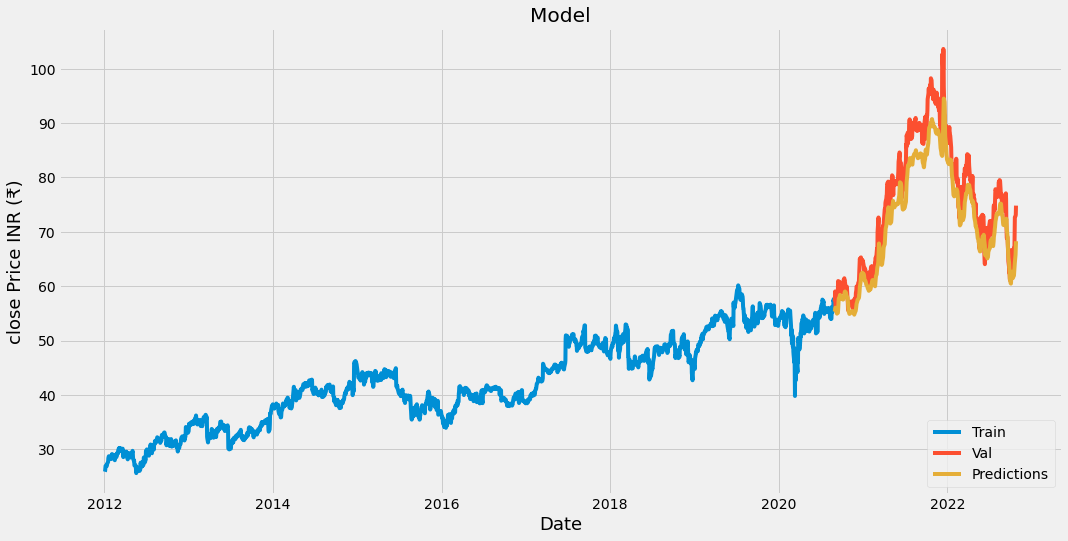

In [168]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val' , 'Predictions'], loc='lower right')
plt.show()
         
         


In [169]:
#show tthe valid and actual price and predicted values
valid

,Close,Predictions
Date,,
2020-08-31,57.220001,55.311867
2020-09-01,57.660000,55.507202
2020-09-02,59.029999,55.669876
2020-09-03,57.099998,56.038883
2020-09-04,55.730000,56.043339
...,...,...
2022-10-20,69.250000,63.589031
2022-10-21,72.699997,64.370514
2022-10-24,72.919998,65.784225


In [170]:
#create a new data frame
new_df = df.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be valuesbetween 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
ploting_pred = np.append(pred_price, last_60_days, axis = 0)


[[69.36693]]
